In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import seaborn as sn
from sklearn.model_selection import train_test_split

In [2]:
dad_df = pd.read_csv("DADData.csv")
dad_df.head()

,AGE,GENDER,MARITAL STATUS,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP-HIGH,BP-LOW,HISTORY,UREA,CREATININE,MODE OF ARRIVAL,TYPE OF ADMSN,TOTAL COST TO HOSPITAL,TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY - WARD,IMPLANT USED,COST OF IMPLANT
0,58.0,M,MARRIED,49,160,118,100.0,80.0,NaN,33.0,0.8,AMBULANCE,EMERGENCY,660293,25,12,13,Y,38000
1,59.0,M,MARRIED,41,155,78,70.0,50.0,NaN,95.0,1.7,AMBULANCE,EMERGENCY,809130,41,20,21,Y,39690
2,82.0,M,MARRIED,47,164,100,110.0,80.0,Diabetes,15.0,0.8,WALKED IN,ELECTIVE,362231,18,9,9,N,0
3,46.0,M,MARRIED,80,173,122,110.0,80.0,Hypertension,74.0,1.5,AMBULANCE,EMERGENCY,629990,14,13,1,Y,89450
4,60.0,M,MARRIED,58,175,72,180.0,100.0,Diabetes,48.0,1.9,AMBULANCE,EMERGENCY,444876,24,12,12,N,0


In [3]:
dad_df.columns = ["age","gender","martial_stat","body_weight","body_height","hr_pulse","bp_high","bp_low","hist","urea","crea","m_arrival","admsn","t_cost_hosp","t_lenght_stay","t_lenght_stay_icu","t_lenght_stay_ward","implant","c_implant"]
dad_df.head()


,age,gender,martial_stat,body_weight,body_height,hr_pulse,bp_high,bp_low,hist,urea,crea,m_arrival,admsn,t_cost_hosp,t_lenght_stay,t_lenght_stay_icu,t_lenght_stay_ward,implant,c_implant
0,58.0,M,MARRIED,49,160,118,100.0,80.0,NaN,33.0,0.8,AMBULANCE,EMERGENCY,660293,25,12,13,Y,38000
1,59.0,M,MARRIED,41,155,78,70.0,50.0,NaN,95.0,1.7,AMBULANCE,EMERGENCY,809130,41,20,21,Y,39690
2,82.0,M,MARRIED,47,164,100,110.0,80.0,Diabetes,15.0,0.8,WALKED IN,ELECTIVE,362231,18,9,9,N,0
3,46.0,M,MARRIED,80,173,122,110.0,80.0,Hypertension,74.0,1.5,AMBULANCE,EMERGENCY,629990,14,13,1,Y,89450
4,60.0,M,MARRIED,58,175,72,180.0,100.0,Diabetes,48.0,1.9,AMBULANCE,EMERGENCY,444876,24,12,12,N,0


In [4]:
dad_df.shape

(248, 19)

In [5]:
dad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 248 non-null    float64
 1   gender              248 non-null    object 
 2   martial_stat        248 non-null    object 
 3   body_weight         248 non-null    int64  
 4   body_height         248 non-null    int64  
 5   hr_pulse            248 non-null    int64  
 6   bp_high             225 non-null    float64
 7   bp_low              225 non-null    float64
 8   hist                75 non-null     object 
 9   urea                235 non-null    float64
 10  crea                215 non-null    float64
 11  m_arrival           248 non-null    object 
 12  admsn               248 non-null    object 
 13  t_cost_hosp         248 non-null    int64  
 14  t_lenght_stay       248 non-null    int64  
 15  t_lenght_stay_icu   248 non-null    int64  
 16  t_lenght

In [6]:
#B) Retrieving missing values 
dad_df.isnull().sum()

age                     0
gender                  0
martial_stat            0
body_weight             0
body_height             0
hr_pulse                0
bp_high                23
bp_low                 23
hist                  173
urea                   13
crea                   33
m_arrival               0
admsn                   0
t_cost_hosp             0
t_lenght_stay           0
t_lenght_stay_icu       0
t_lenght_stay_ward      0
implant                 0
c_implant               0
dtype: int64

In [7]:
#B) Specifying missing values 
missing_values = ["nan","n.a","NA","n/a","?"]
dad_df2 = pd.read_csv("DADData.csv", na_values = missing_values)
dad_df2.columns = ["age","gender","martial_stat","body_weight","body_height","hr_pulse","bp_high","bp_low","hist","urea","crea","m_arrival","admsn","t_cost_hosp","t_lenght_stay","t_lenght_stay_icu","t_lenght_stay_ward","implant","c_implant"]
dad_df2.head()

,age,gender,martial_stat,body_weight,body_height,hr_pulse,bp_high,bp_low,hist,urea,crea,m_arrival,admsn,t_cost_hosp,t_lenght_stay,t_lenght_stay_icu,t_lenght_stay_ward,implant,c_implant
0,58.0,M,MARRIED,49,160,118,100.0,80.0,NaN,33.0,0.8,AMBULANCE,EMERGENCY,660293,25,12,13,Y,38000
1,59.0,M,MARRIED,41,155,78,70.0,50.0,NaN,95.0,1.7,AMBULANCE,EMERGENCY,809130,41,20,21,Y,39690
2,82.0,M,MARRIED,47,164,100,110.0,80.0,Diabetes,15.0,0.8,WALKED IN,ELECTIVE,362231,18,9,9,N,0
3,46.0,M,MARRIED,80,173,122,110.0,80.0,Hypertension,74.0,1.5,AMBULANCE,EMERGENCY,629990,14,13,1,Y,89450
4,60.0,M,MARRIED,58,175,72,180.0,100.0,Diabetes,48.0,1.9,AMBULANCE,EMERGENCY,444876,24,12,12,N,0


In [8]:
#B) replace missign values with mean for numeric type 
dad_df2["bp_high"].fillna(int(dad_df2["bp_high"].mean()),inplace=True)
dad_df2["bp_low"].fillna(int(dad_df2["bp_low"].mean()),inplace=True)
dad_df2["urea"].fillna(int(dad_df2["urea"].mean()),inplace=True)
dad_df2["crea"].fillna(int(dad_df2["crea"].mean()),inplace=True)
dad_df2["hist"].fillna(str("none"),inplace=True)


In [9]:
dad_df2.isnull().sum()

age                   0
gender                0
martial_stat          0
body_weight           0
body_height           0
hr_pulse              0
bp_high               0
bp_low                0
hist                  0
urea                  0
crea                  0
m_arrival             0
admsn                 0
t_cost_hosp           0
t_lenght_stay         0
t_lenght_stay_icu     0
t_lenght_stay_ward    0
implant               0
c_implant             0
dtype: int64

In [10]:
#C dummy variable 
X_df = dad_df2.drop("t_cost_hosp",axis=1)
X_df = pd.get_dummies(X_df,drop_first=True)
X_df.head()

,age,body_weight,body_height,hr_pulse,bp_high,bp_low,urea,crea,t_lenght_stay,t_lenght_stay_icu,...,c_implant,gender_M,martial_stat_UNMARRIED,hist_Hypertension,hist_none,hist_other,m_arrival_TRANSFERRED,m_arrival_WALKED IN,admsn_EMERGENCY,implant_Y
0,58.0,49,160,118,100.0,80.0,33.0,0.8,25,12,...,38000,1,0,0,1,0,0,0,1,1
1,59.0,41,155,78,70.0,50.0,95.0,1.7,41,20,...,39690,1,0,0,1,0,0,0,1,1
2,82.0,47,164,100,110.0,80.0,15.0,0.8,18,9,...,0,1,0,0,0,0,0,1,0,0
3,46.0,80,173,122,110.0,80.0,74.0,1.5,14,13,...,89450,1,0,1,0,0,0,0,1,1
4,60.0,58,175,72,180.0,100.0,48.0,1.9,24,12,...,0,1,0,0,0,0,0,0,1,0


In [11]:
#D)
X_df["BMI"] = X_df["body_weight"]*np.square(X_df["body_height"])
X_df.head()

,age,body_weight,body_height,hr_pulse,bp_high,bp_low,urea,crea,t_lenght_stay,t_lenght_stay_icu,...,gender_M,martial_stat_UNMARRIED,hist_Hypertension,hist_none,hist_other,m_arrival_TRANSFERRED,m_arrival_WALKED IN,admsn_EMERGENCY,implant_Y,BMI
0,58.0,49,160,118,100.0,80.0,33.0,0.8,25,12,...,1,0,0,1,0,0,0,1,1,1254400
1,59.0,41,155,78,70.0,50.0,95.0,1.7,41,20,...,1,0,0,1,0,0,0,1,1,985025
2,82.0,47,164,100,110.0,80.0,15.0,0.8,18,9,...,1,0,0,0,0,0,1,0,0,1264112
3,46.0,80,173,122,110.0,80.0,74.0,1.5,14,13,...,1,0,1,0,0,0,0,1,1,2394320
4,60.0,58,175,72,180.0,100.0,48.0,1.9,24,12,...,1,0,0,0,0,0,0,1,0,1776250


///////////////////////////////////
age
-----------------------------------
0.8484482824821475 body_weight
0.717490668572714 body_height
-0.8985482270991179 martial_stat_UNMARRIED
0.8286868705556584 BMI
///////////////////////////////////
body_weight
-----------------------------------
0.8484482824821475 age
0.8502133855046464 body_height
-0.8314080022636251 martial_stat_UNMARRIED
0.9802165614414744 BMI
///////////////////////////////////
body_height
-----------------------------------
0.717490668572714 age
0.8502133855046464 body_weight
0.8657816515783078 BMI
///////////////////////////////////
hr_pulse
-----------------------------------
///////////////////////////////////
bp_high
-----------------------------------
0.7667604026323852 bp_low
///////////////////////////////////
bp_low
-----------------------------------
0.7667604026323852 bp_high
///////////////////////////////////
urea
-----------------------------------
///////////////////////////////////
crea
----------------------

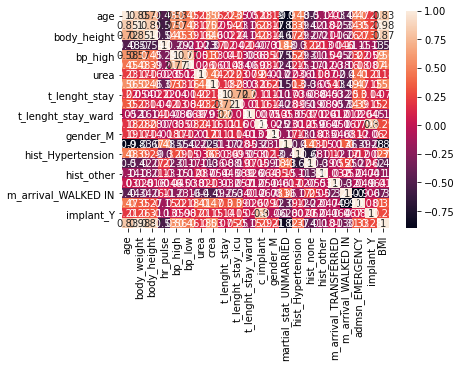

In [12]:
#E) Cheching Multicollinarity by automation
X_df2 = X_df.drop(["body_weight","body_height","martial_stat_UNMARRIED","m_arrival_WALKED IN","bp_low","implant_Y","t_lenght_stay"],axis=1)
sn.heatmap(X_df2.corr(),annot=True)
corr_df2 = X_df2.corr()


row_name = []

for item in corr_df2:
    row_name.append(item)

for item2 in corr_df2:
    print(item2)
    print("-"*35)
    for item3 in row_name:
        if corr_df2[item2][item3] < -0.7 or corr_df2[item2][item3] > 0.7 and corr_df2[item2][item3] != 1 :
            print(corr_df2[item2][item3],item3)
        else:
            continue
            

age
-----------------------------------
0.8286868705556584 BMI
hr_pulse
-----------------------------------
bp_high
-----------------------------------
urea
-----------------------------------
crea
-----------------------------------
t_lenght_stay_icu
-----------------------------------
t_lenght_stay_ward
-----------------------------------
c_implant
-----------------------------------
gender_M
-----------------------------------
hist_Hypertension
-----------------------------------
hist_none
-----------------------------------
hist_other
-----------------------------------
m_arrival_TRANSFERRED
-----------------------------------
admsn_EMERGENCY
-----------------------------------
BMI
-----------------------------------
0.8286868705556584 age


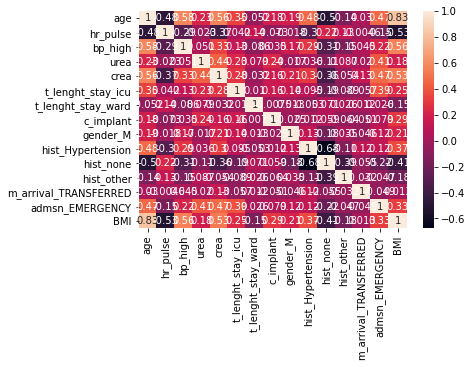

In [13]:
#Multicollinarity: remove body_weight, age 
X_df2 = X_df.drop(["body_weight","body_height","martial_stat_UNMARRIED","m_arrival_WALKED IN","bp_low","implant_Y","t_lenght_stay"],axis=1)
sn.heatmap(X_df2.corr(),annot=True)
corr_df2 = X_df2.corr()


row_name = []

for item in corr_df2:
    row_name.append(item)

for item2 in corr_df2:
    print(item2)
    print("-"*35)
    for item3 in row_name:
        if corr_df2[item2][item3] < -0.7 or corr_df2[item2][item3] > 0.7 and corr_df2[item2][item3] != 1 :
            print(corr_df2[item2][item3],item3)
        else:
            continue
            

In [14]:
#F:train test split :
X = sm.add_constant(X_df2)
Y = dad_df2["t_cost_hosp"]
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,train_size=0.8,random_state=51)

In [15]:
dad_model = sm.OLS(train_Y, train_X).fit()
dad_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
====================================================================================
Model:                     OLS                   Adj. R-squared:          0.851     
Dependent Variable:        t_cost_hosp           AIC:                     4835.3271 
Date:                      2021-11-16 19:46      BIC:                     4887.9394 
No. Observations:          198                   Log-Likelihood:          -2401.7   
Df Model:                  15                    F-statistic:             75.93     
Df Residuals:              182                   Prob (F-statistic):      6.70e-70  
R-squared:                 0.862                 Scale:                   2.1866e+09
------------------------------------------------------------------------------------
                         Coef.     Std.Err.     t    P>|t|     [0.025       0.975]  
------------------------------------------------------------------------------------
const                  43116.2876 34206.4295  1.2605 0.2091  -24375.8737 110608.4489
age                      291.4202   318.5249  0.9149 0.3615    -337.0563    919.8967
hr_pulse                 271.8217   206.1517  1.3186 0.1890    -134.9328    678.5763
bp_high                   69.8995   201.7318  0.3465 0.7294    -328.1343    467.9332
urea                    -167.6547   260.4018 -0.6438 0.5205    -681.4494    346.1400
crea                   15266.4464  8290.2912  1.8415 0.0672   -1090.9952  31623.8879
t_lenght_stay_icu      24125.5411  1179.9819 20.4457 0.0000   21797.3376  26453.7446
t_lenght_stay_ward      4959.7281   902.7092  5.4943 0.0000    3178.6070   6740.8491
c_implant                  1.9187     0.1665 11.5232 0.0000       1.5901      2.2472
gender_M                8510.2629  7369.4274  1.1548 0.2497   -6030.2370  23050.7628
hist_Hypertension     -40620.0336 15968.0150 -2.5438 0.0118  -72126.2697  -9113.7974
hist_none             -39308.4669 15726.3279 -2.4995 0.0133  -70337.8340  -8279.0997
hist_other            -57145.0981 21028.3464 -2.7175 0.0072  -98635.7936 -15654.4025
m_arrival_TRANSFERRED -45359.3072 47687.1886 -0.9512 0.3428 -139450.1398  48731.5254
admsn_EMERGENCY       -27316.9559 12864.6571 -2.1234 0.0351  -52700.0061  -1933.9058
BMI                        0.0054     0.0101  0.5358 0.5928      -0.0145      0.0252
------------------------------------------------------------------------------------
Omnibus:                    171.875            Durbin-Watson:               2.233   
Prob(Omnibus):              0.000              Jarque-Bera (JB):            5987.765
Skew:                       2.914              Prob(JB):                    0.000   
Kurtosis:                   29.303             Condition No.:               16216853
====================================================================================
* The condition number is large (2e+07). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [16]:
def backward_elimination(model, y, X, features):
    while True:
        if max(model.pvalues[features]) > 0.05:
            drop_variable = model.pvalues[model.pvalues == max(model.pvalues[features])]
            print("Dropping " + drop_variable.index[0] + " and running regression again because pvalue is: " + str(drop_variable[0]))
            X = X.drop(columns = [drop_variable.index[0]])
            features = features.drop(drop_variable.index[0])
            model= sm.OLS(y, X).fit()
        else:
            print("All p values less than 0.05")
            return features
            break;
        
significant_Features = backward_elimination(dad_model, train_Y, train_X, X.columns)
print(significant_Features)

train_X = sm.add_constant(train_X[significant_Features])
dad_model2 = sm.OLS(train_Y, train_X).fit()
dad_model2.summary2()


Dropping bp_high and running regression again because pvalue is: 0.7293694310062334
Dropping BMI and running regression again because pvalue is: 0.5718004714346365
Dropping urea and running regression again because pvalue is: 0.448196563279071
Dropping m_arrival_TRANSFERRED and running regression again because pvalue is: 0.3296896024064405
Dropping hr_pulse and running regression again because pvalue is: 0.2598225173663825
Dropping gender_M and running regression again because pvalue is: 0.13089852534935328
Dropping crea and running regression again because pvalue is: 0.0887257576989412
All p values less than 0.05
Index(['const', 'age', 't_lenght_stay_icu', 't_lenght_stay_ward', 'c_implant',
       'hist_Hypertension', 'hist_none', 'hist_other', 'admsn_EMERGENCY'],
      dtype='object')


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                    OLS                  Adj. R-squared:         0.850     
Dependent Variable:       t_cost_hosp          AIC:                    4830.2822 
Date:                     2021-11-16 19:46     BIC:                    4859.8766 
No. Observations:         198                  Log-Likelihood:         -2406.1   
Df Model:                 8                    F-statistic:            140.3     
Df Residuals:             189                  Prob (F-statistic):     3.04e-75  
R-squared:                0.856                Scale:                  2.2030e+09
---------------------------------------------------------------------------------
                      Coef.     Std.Err.     t    P>|t|     [0.025       0.975]  
---------------------------------------------------------------------------------
const               89195.4400 17682.5698  5.0443 0.0000   54314.8899 124075.9901
age                   466.9195   182.6314  2.5566 0.0114     106.6616    827.1773
t_lenght_stay_icu   24566.5973  1118.1409 21.9709 0.0000   22360.9580  26772.2365
t_lenght_stay_ward   4923.5785   884.9499  5.5637 0.0000    3177.9306   6669.2263
c_implant               1.9419     0.1539 12.6211 0.0000       1.6384      2.2454
hist_Hypertension  -43030.4383 15542.0630 -2.7686 0.0062  -73688.6353 -12372.2414
hist_none          -44694.9618 15232.8154 -2.9341 0.0038  -74743.1385 -14646.7851
hist_other         -60895.1165 20261.2551 -3.0055 0.0030 -100862.3685 -20927.8645
admsn_EMERGENCY    -23663.6537 11618.9238 -2.0366 0.0431  -46583.0857   -744.2217
---------------------------------------------------------------------------------
Omnibus:                   172.425           Durbin-Watson:              2.235   
Prob(Omnibus):             0.000             Jarque-Bera (JB):           6377.684
Skew:                      2.903             Prob(JB):                   0.000   
Kurtosis:                  30.191            Condition No.:              223160  
=================================================================================
* The condition number is large (2e+05). This might indicate             strong
multicollinearity or other numerical problems.
"""

Text(0.5, 0, 'counts ')

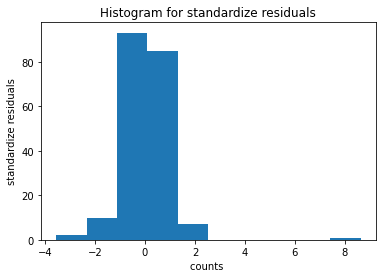

In [17]:
#I) Regression Assumptions:
#Linearity:
from scipy.stats import zscore
plt.hist(zscore(dad_model2.resid))
plt.title("Histogram for standardize residuals")
plt.ylabel("standardize residuals")
plt.xlabel("counts ")

Text(0, 0.5, 'standardized resid')

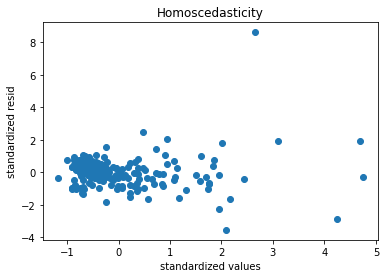

In [18]:
#Homoscedasticity:
plt.scatter(zscore(dad_model2.fittedvalues),zscore(dad_model2.resid))
plt.title("Homoscedasticity")
plt.xlabel("standardized values")
plt.ylabel("standardized resid")


In [19]:
#J)
pred_y = dad_model2.predict(test_X[significant_Features])


In [20]:
np.abs(r2_score(test_Y,pred_y))

0.802870488419483

In [21]:
np.sqrt(mean_squared_error(test_Y,pred_y))

56696.37100439078